<a href="https://colab.research.google.com/github/Rahman88talha/Data_Analysis_with_Talha/blob/main/EDA_Play_Store_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>
# <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps. </b>
# <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

# **Introduction**

<b> The objective of this project is to deliver insights to understand customer demands better and thus help developers to popularize the product. there are two Dataset. One is 'Play store data' and other is 'User Review Data'. This dataset contains details of different applications and reviews from different users.

## Gathering data
This step is about getting to know the data and understanding what has to be done. This can be done by reading the CSV file and doing initial statistical analysis.

Let's Import

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Importing Libraries
Let us start by importing some of the required libraries with which we will be working on.


In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

Loading the dataset as a pandas data frame.
As there are two sets of data 
i) play store data
ii) user review data

In [2]:
play_store_data = pd.read_csv("/content/drive/MyDrive/Data/Play Store Data.csv")  #df=Data Frame
user_reviews_data = pd.read_csv('/content/drive/MyDrive/Data/User Reviews.csv')

# Reading the Data

In [3]:
play_store_data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [4]:
user_reviews_data

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [ ]:
type(play_store_data)
type(user_reviews_data)

pandas.core.frame.DataFrame

Let's Check

In [5]:
play_store_data.head()          #Inspecting the first 5 rows

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
user_reviews_data.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [6]:
play_store_data.shape

(10841, 13)

In [7]:
user_reviews_data.shape

(64295, 5)

### Summary Statistics of Play Store Data

In [8]:
play_store_data.describe()          # Only Rating column is numerical data.Hence, it's showing description of only Rating column.

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


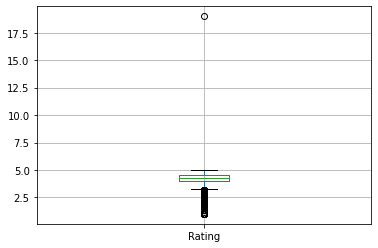

In [9]:
play_store_data.boxplot()

The above boxplot shows that most of our data is this dataset is concentrated between 3.0 to 5.0 rating.
However, there is one outlier which is showing the value not appropriate. So, we'll remove it.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd77c68a090>]],
      dtype=object)

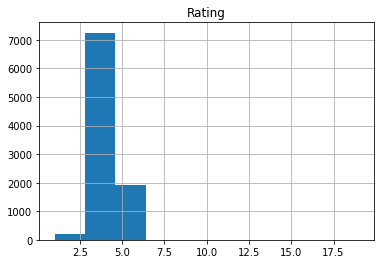

In [10]:
play_store_data.hist()

### Getting Information about whole Datasets.

In [11]:
play_store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


As only Rating has numerical data, So first we will explore Rating then convert columns like Size, Installs, Reviews into numerical form for performing analysis.

In [12]:
user_reviews_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


<b> Now We will Perform all the action on Play Store Data

# Data Cleaning

### Count the number of missing values in Dataframe

In [13]:
play_store_data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In this Dataset, Only Rating column has significant number of missing values

## Checking Outliers in Rating column 
### (Ratings more than 5)

In [14]:
play_store_data[play_store_data.Rating > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


Now, removing this outlier as it's rating is 19 which is not appropriate.

Dropping this outlier

In [15]:
play_store_data.drop([10472], inplace=True)

Checking whether it's dropped or not  ?

In [16]:
play_store_data[10470:10475]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up


Hence, index row [10472] has been removed.

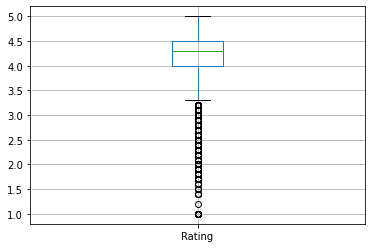

In [17]:
play_store_data.boxplot()     # outlier is removed 

<b> Outlier has been removed as it can be seen from boxplot.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd77ae784d0>]],
      dtype=object)

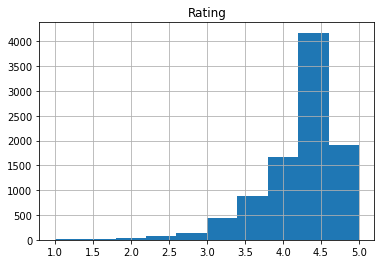

In [18]:
play_store_data.hist()

Yes, it's indeed rightly skewed after removing outlier.

## Missing values

We can use central tendency measures such as mean, median or mode of the numeric feature column to replace or impute missing values.  Pandas Dataframe method can be used to replace the missing values. Methods such as mean(), median() and mode() can be used on Dataframe for finding their values

For rightly or left skewed data we generally prefer Median instead of Mean.

# Data Imputation and Manipulation

Filling the null values using aggregate functions such as mean, median, mode.

Here we are using median because of numerical data. 

For categorical data we use mode.

In [19]:
# Define a function impute median
def impute_median(series):
    return series.fillna(series.median())

In [20]:
play_store_data.Rating = play_store_data['Rating'].transform(impute_median)
# Filling all the values of Rating column with median

In [21]:
# Now again checking for null values
play_store_data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

### Missing values in categorical column.

Mode can be used for categorical data for missing values

Checking modes of categorical column that have null values like 'type', 'Current Ver' and 'Android Ver'.

In [22]:
print(play_store_data['Type'].mode())
print(play_store_data['Current Ver'].mode())
print(play_store_data['Android Ver'].mode())

0    Free
dtype: object
0    Varies with device
dtype: object
0    4.1 and up
dtype: object


### Fill the missing categorical values with mode

 Pandas Dataframe method in Python such as *fillna* can be used to replace the missing values

In [23]:
play_store_data['Type'].fillna(str(play_store_data['Type'].mode().values[0]), inplace=True)
play_store_data['Current Ver'].fillna(str(play_store_data['Current Ver'].mode().values[0]), inplace=True)
play_store_data['Android Ver'].fillna(str(play_store_data['Android Ver'].mode().values[0]), inplace=True)

In [24]:
play_store_data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

Hence, All the missing values have been filled accordingly

## Converting Categorical Data to Numerical Data.

Let's convert Price, Reviews and installs into Numerical values


In [25]:
play_store_data['Price'] = play_store_data['Price'].apply(lambda x: str(x).replace('$', ' ') if '$' in str(x) else str(x))
play_store_data['Price'] = play_store_data['Price'].apply(lambda x: float(x))

In [26]:
play_store_data['Reviews'] = pd.to_numeric(play_store_data['Reviews'], errors='coerce')

In [27]:
play_store_data['Installs'] = play_store_data['Installs'].apply(lambda x: str(x).replace('+', '') if '+' in str(x) else str(x))
play_store_data['Installs'] = play_store_data['Installs'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else str(x))
play_store_data['Installs'] = play_store_data['Installs'].apply(lambda x: float(x))

In [28]:
play_store_data['Installs'].unique()

array([1.e+04, 5.e+05, 5.e+06, 5.e+07, 1.e+05, 5.e+04, 1.e+06, 1.e+07,
       5.e+03, 1.e+08, 1.e+09, 1.e+03, 5.e+08, 5.e+01, 1.e+02, 5.e+02,
       1.e+01, 1.e+00, 5.e+00, 0.e+00])

In [29]:
play_store_data.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,50000.0,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,50000.0,Free,0.0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,1000000.0,Free,0.0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,1000000.0,Free,0.0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,10000.0,Free,0.0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [30]:
play_store_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  float64
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10840 non-null  object 
 12  Android Ver     10840 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 1.2+ MB


# Now let's see
Summary Stats after Cleaning

In [31]:
play_store_data.describe()

,Rating,Reviews,Installs,Price
count,10840.000000,1.084000e+04,1.084000e+04,10840.000000
mean,4.206476,4.441529e+05,1.546434e+07,1.027368
std,0.480342,2.927761e+06,8.502936e+07,15.949703
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


Lets drop useless column

In [32]:
play_store_data.drop(['Current Ver','Last Updated', 'Android Ver'], axis=1, inplace=True)

Now, Let's convert Size column

In [33]:
play_store_data['Size'] = play_store_data.Size.apply(lambda x: x.strip('+'))   # Removing the + Sign
play_store_data['Size'] = play_store_data.Size.apply(lambda x: x.replace(',', ''))    # For removing the `,`
play_store_data['Size'] = play_store_data.Size.apply(lambda x: x.replace('M', 'e+6'))    # For converting the M to Mega
play_store_data['Size'] = play_store_data.Size.apply(lambda x: x.replace('k', 'e+3'))    # For converting the K to Kilo
play_store_data['Size'] = play_store_data.Size.replace('Varies with device', np.NaN)

In [34]:
play_store_data['Size'] = pd.to_numeric(play_store_data['Size'])      # Converting the string to Numeric type

In [35]:
play_store_data.dropna(subset = ['Size'], inplace=True)

In [36]:
play_store_data.describe()

,Rating,Reviews,Size,Installs,Price
count,9145.000000,9.145000e+03,9.145000e+03,9.145000e+03,9145.000000
mean,4.193384,2.490487e+05,2.151653e+07,7.114842e+06,1.184366
std,0.502702,1.716211e+06,2.258875e+07,4.619357e+07,17.355754
min,1.000000,0.000000e+00,8.500000e+03,0.000000e+00,0.000000
25%,4.100000,2.200000e+01,4.900000e+06,1.000000e+03,0.000000
50%,4.300000,7.420000e+02,1.300000e+07,1.000000e+05,0.000000
75%,4.500000,2.503700e+04,3.000000e+07,1.000000e+06,0.000000
max,5.000000,4.489389e+07,1.000000e+08,1.000000e+09,400.000000


# Data Visualisation

Let's set our fig size, font size, etc.


In [37]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## Counts of app in each category

In [38]:
top_category = play_store_data.Category.value_counts().reset_index().rename(columns={'Category':'Count','index':'Category'})

In [39]:
category_installs = play_store_data.groupby(['Category'])[['Installs']].sum()

In [40]:
top_category_installs = pd.merge(top_category, category_installs, on='Category')
top_20_category_installs = top_category_installs

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


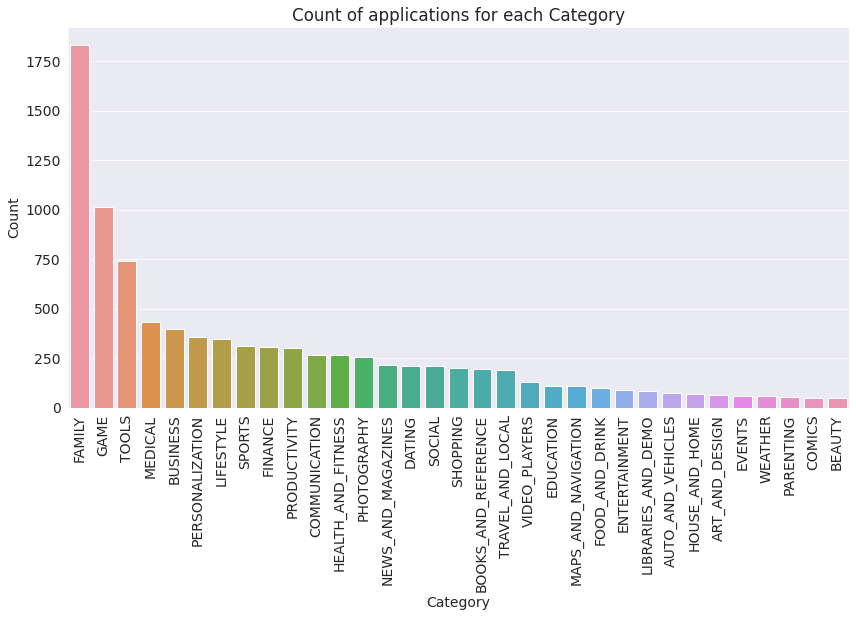

In [41]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.ylabel("Number of application")
plt.title("Count of applications for each Category")
sns.barplot(top_20_category_installs.Category, top_20_category_installs.Count)
plt.show()

As we can see Family is the category which is most downloaded

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


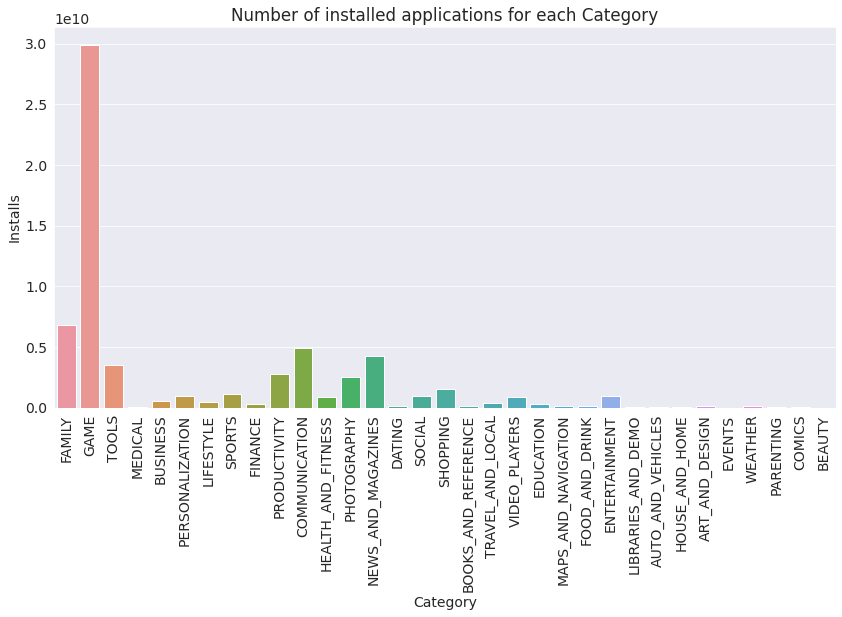

In [42]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.ylabel("Installs")
plt.title("Number of installed applications for each Category")
sns.barplot(top_20_category_installs.Category, top_20_category_installs.Installs)
plt.show()

## Histogram of Size of Application

In [43]:
# to remove null values from size column
play_store_data.loc[play_store_data['Size'].isnull(),'Size']=0

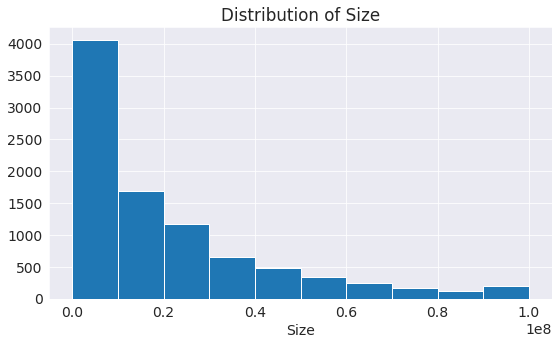

In [44]:
plt.xlabel("Size")
plt.title("Distribution of Size")
plt.hist(play_store_data['Size']);
plt.show()

#### From the above histogram, it can be concluded that maximum number of applications present in the dataset are of small size.

## Which category of Apps from the ‘Content Rating’ column is found more on the play store?

In [45]:
x = play_store_data['Content Rating'].value_counts().index
y = play_store_data['Content Rating'].value_counts()

xsis = []
ysis = []
for i in range(len(x)):
    xsis.append(x[i])
    ysis.append(y[i])

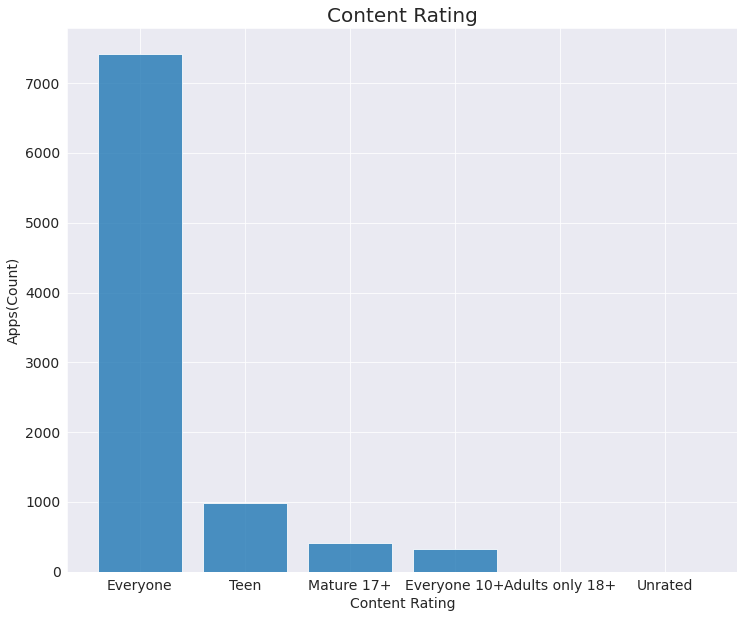

In [46]:
plt.figure(figsize=(12,10))
plt.bar(xsis,ysis,width=0.8, alpha=0.8);
plt.title('Content Rating',size = 20);
plt.ylabel('Apps(Count)');
plt.xlabel('Content Rating');

*Everyone* category has the highest number of apps

## Paid vs Free Apps

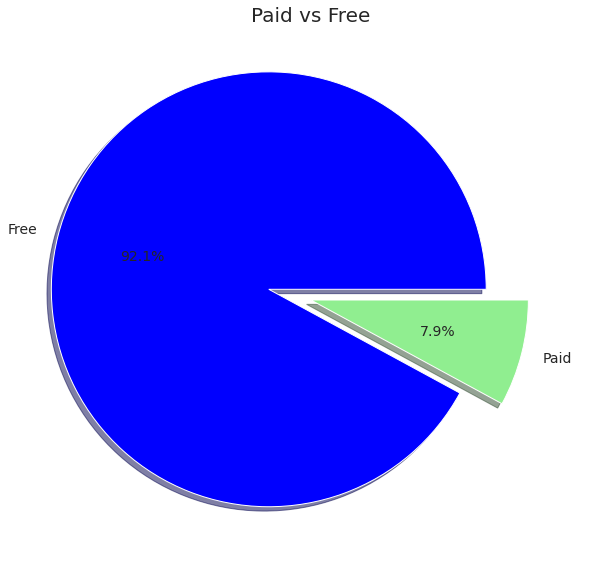

In [47]:
plt.figure(figsize=(10,10))
labels = play_store_data['Type'].value_counts(sort = True).index
sizes = play_store_data['Type'].value_counts(sort = True)
colors = ["blue","lightgreen"]
explode = (0.2,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=0)
plt.title('Paid vs Free',size = 20)
plt.show()

Approx 92% of all applications are Free.

In [48]:
app_count = play_store_data.groupby(['Category','Type'])[['App']].count().reset_index().rename(columns={'App':'Count','index':'App'})

In [49]:
df_app_count = app_count.pivot('Category', 'Type', 'Count').fillna(0).reset_index()

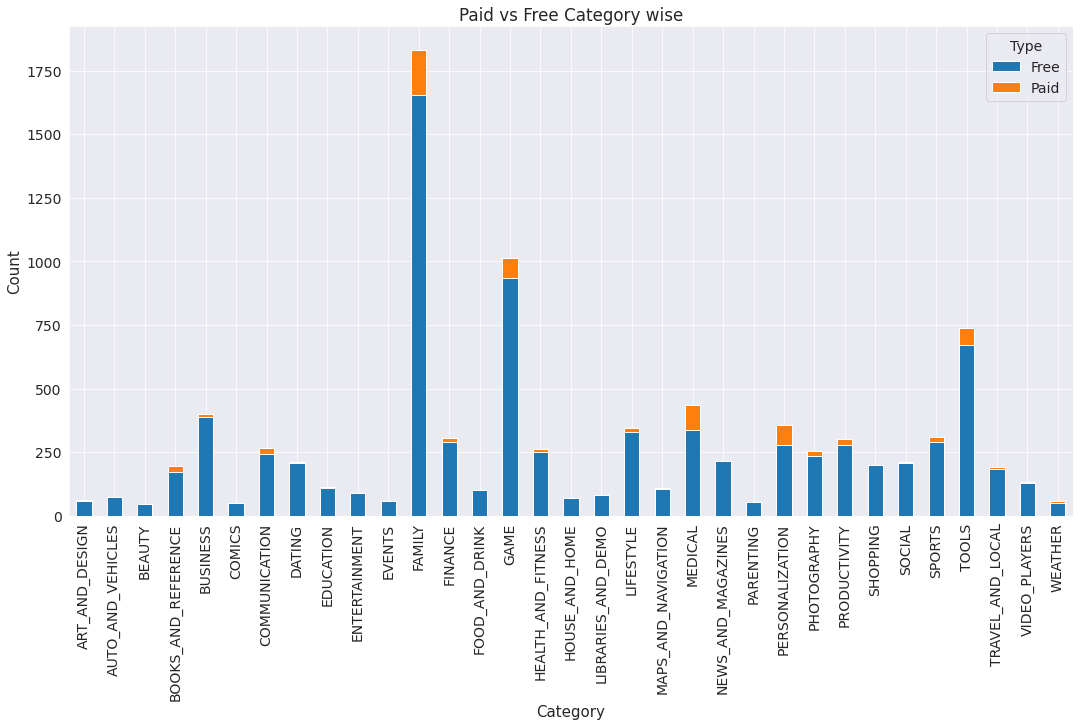

In [50]:
df_app_count.set_index('Category').plot(kind='bar', stacked=True, figsize=(18,9))
plt.xlabel("Category", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Paid vs Free Category wise")
plt.show()

#### some app categories have more free apps available for download than others.the majority of apps in Family, Food & Drink and Tools free to install. At the same time Family, Sports, Tools and Medical categories had the biggest number of paid apps available for download.

# Now User Review Data

In [52]:
user_reviews_data.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


#### In the User Review Dataframe, we have two numerical columns i.e.. Sentiment Polarity and Sentiment Subjectivity. Sentiment basically determines the attitude or the emotion of the writer, i.e., whether it is positive or negative or neutral. Sentiment Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement. Sentiment Subjectivity generally refer to personal opinion, emotion or judgment, which lies in the range of [0,1].

## Histogram Of Subjectivity

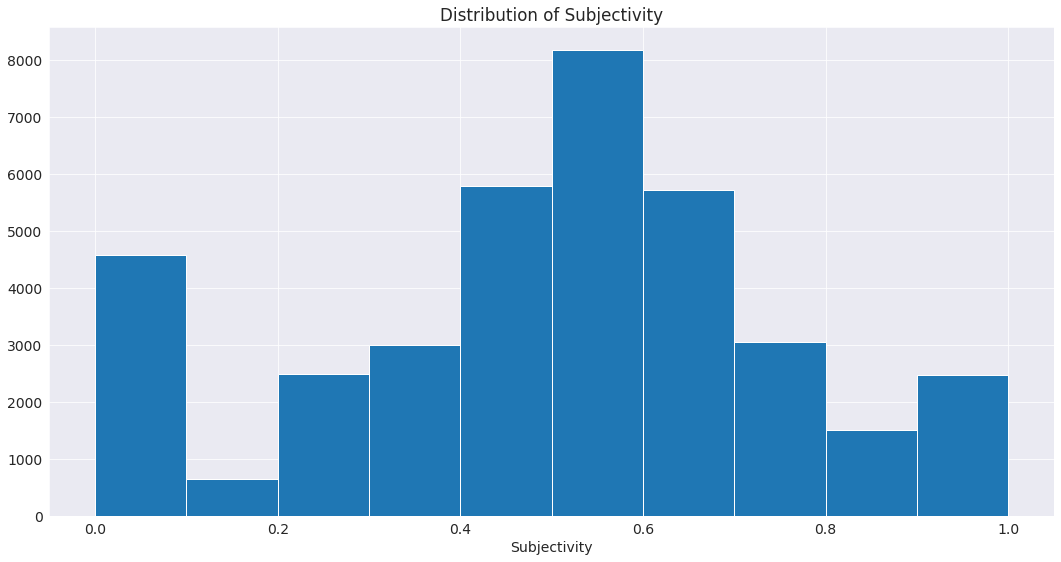

In [53]:
plt.figure(figsize=(18,9))
plt.xlabel("Subjectivity")
plt.title("Distribution of Subjectivity")
plt.hist(user_reviews_data[user_reviews_data['Sentiment_Subjectivity'].notnull()]['Sentiment_Subjectivity'])
plt.show()

#### It can be seen that maximum number of sentiment subjectivity lies between 0.4 to 0.7. From this we can conclude that maximum number of users give reviews to the applications according to their experience.

### Does sentiment_subjectivity proportional to sentiment_polarity?

In [54]:
user_reviews_data['Sentiment_Subjectivity'] = user_reviews_data['Sentiment_Subjectivity'].abs()

In [ ]:
user_reviews_data['Sentiment_Polarity'] = user_reviews_data['Sentiment_Polarity'].abs()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


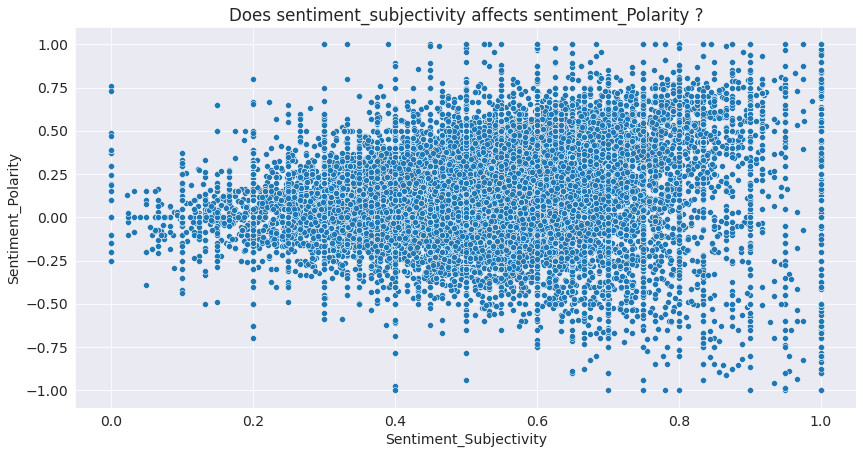

In [55]:
plt.figure(figsize=(14,7))
sns.scatterplot(user_reviews_data['Sentiment_Subjectivity'], user_reviews_data['Sentiment_Polarity'])
plt.title("Does sentiment_subjectivity affects sentiment_Polarity ?")
plt.show()

#### It can be concluded that sentiment subjectivity is not always proportional to sentiment polarity but in maximum number of case shows a proportional behaviour

## Merging data frames

In [61]:
merged_df = play_store_data.merge(user_reviews_data, on="App")

What is the distribution of type of reviews in the dataset?

In [62]:
category_sentiment = merged_df.groupby(['Category','Sentiment']).size().reset_index(name='Sentiment Count')

In [63]:
category_sentiment['log_sentiment_count'] = np.log2(category_sentiment['Sentiment Count'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


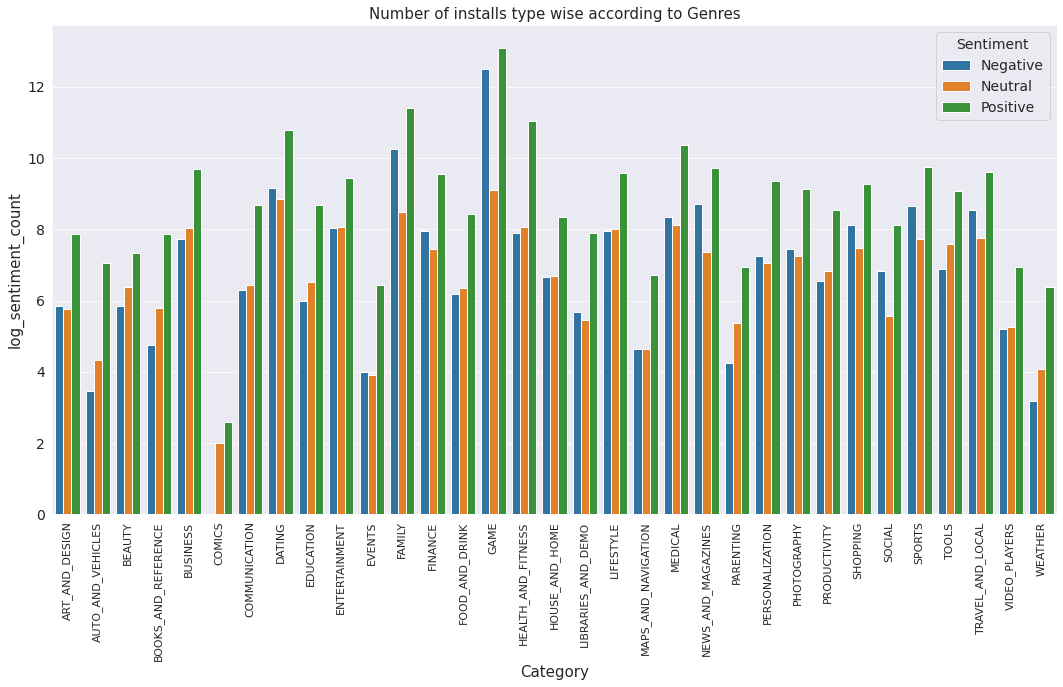

In [64]:
plt.figure(figsize=(18,9))
plt.xticks(rotation=90,fontsize=11)
plt.xlabel("Category", fontsize=15)
plt.ylabel("Installs", fontsize=15)
plt.title("Number of installs type wise according to Genres",fontsize=15)
sns.barplot('Category', 'log_sentiment_count', hue='Sentiment', data=category_sentiment);

**Percentage of Review Sentiments**

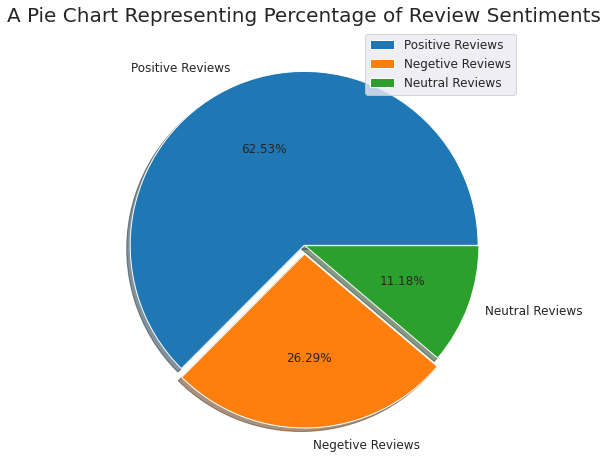

In [65]:
counts = list(merged_df['Sentiment'].value_counts())
labels = 'Positive Reviews', 'Negetive Reviews','Neutral Reviews'
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (8, 8)
plt.pie(counts, labels=labels, explode=[0, 0.05, 0.005], shadow=True, autopct="%.2f%%")
plt.title('A Pie Chart Representing Percentage of Review Sentiments', fontsize=20)
plt.axis('off')
plt.legend()
plt.show()

## Bivariate Analysis

### 1) Effect of size on rating

Make a joinplot to understand the effect of size on rating


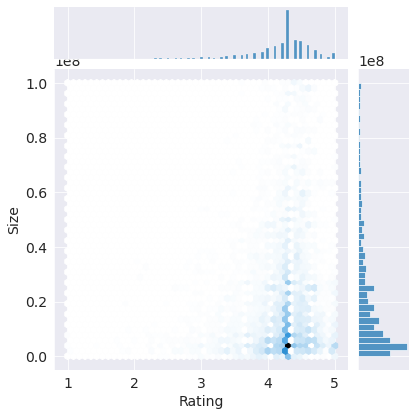

In [56]:
sns.jointplot(y ='Size', x ='Rating', data = play_store_data, kind ='hex')
plt.show()

Now, There is a correlation between Size and Rating.

Generally on increasing Rating, Size of App also increases. But this is not always true. For higher Rating, there is constant Size. Thus we can conclude that there is positive correlation between Size and Rating.

## 2)  Effect of price on rating


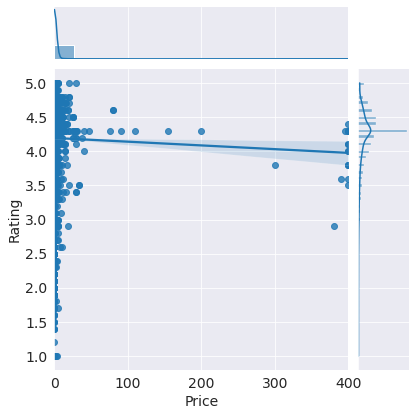

In [57]:
sns.jointplot(x='Price', y='Rating', data=play_store_data, kind='reg')
plt.show()

Limit data to records with price < $30

In [58]:
gt_30 = play_store_data[play_store_data['Price'] > 30].index
play_store_data.drop(labels=gt_30, inplace=True)

In [59]:
count = play_store_data.loc[play_store_data['Price'] > 30].index
count.value_counts().sum()

0

Now we have limited price column not greater than 30.
now again making jointplot

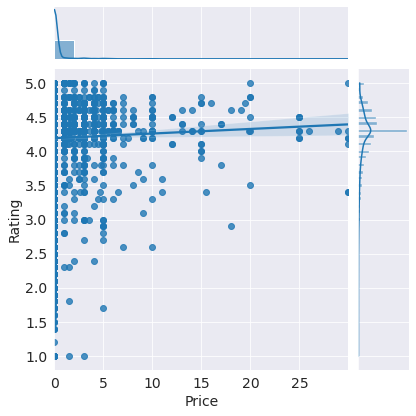

In [60]:
sns.jointplot(x='Price', y='Rating', data=play_store_data, kind='reg')
plt.show()

Generally on increasing the Price, Rating remains almost constant greater than 4.
Hence, there is very weak Positive correlation between Rating and Price.

## Look at all the numeric interactions together

plot with the colulmns - 'Reviews', 'Size', 'Rating', 'Price'

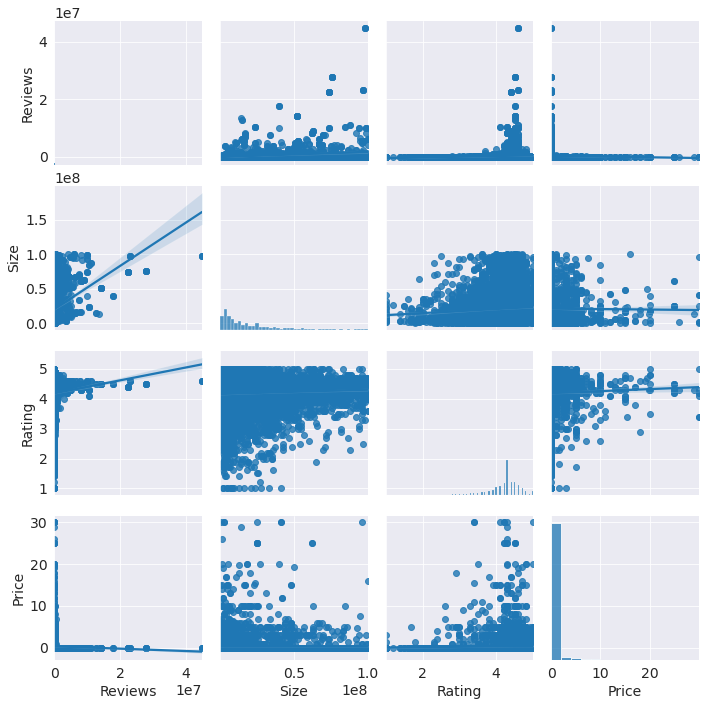

In [ ]:
sns.pairplot(play_store_data, vars=['Reviews', 'Size', 'Rating', 'Price'], kind='reg')
plt.show()

### Correlation Matrix

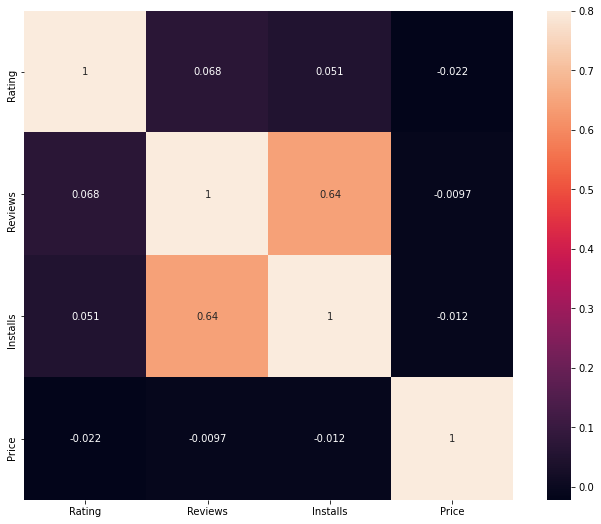

In [ ]:
corrmat = play_store_data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True,annot = True)

# <b> Conclusion
The dataset contains possibilities to deliver insights to understand customer demands better and thus help developers to popularize the product. Dataset can also be used to look whether the original ratings of the app matches the predicted rating to know whether the app is performing better or worse compared to other apps on the Play Store.